## CLARA multicore scaling

In [1]:
import json
from io import StringIO

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.4
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.autolayout'] = True

### Parameters

In [2]:
params = {
    'date': '2022-07-26',
    'host': 'nid006361',
    'chain': ['MAGFIELDS', 'FTCAL', 'FTHODO', 'FTEB', 'DCCR', 'MLTD', 'DCHAI', 'FTOFHB', 'EC', 'CVTFP', 'CTOF', 'CND', 'BAND', 'HTCC', 'LTCC', 'EBHB', 'DCTB', 'FMT', 'CVTSP', 'FTOFTB', 'EBTB', 'RICH', 'RTPC'],
    'input_file': './clas_006302.evio.00005-00009.hipo',
    'output_file': '/pscratch/sd/t/tylern/clas12/recon/test.hipo',
    'n_events': '2000',
    'jvm_options': ''
}

print(json.dumps(params, indent=4))

{
    "date": "2022-07-26",
    "host": "nid006361",
    "chain": [
        "MAGFIELDS",
        "FTCAL",
        "FTHODO",
        "FTEB",
        "DCCR",
        "MLTD",
        "DCHAI",
        "FTOFHB",
        "EC",
        "CVTFP",
        "CTOF",
        "CND",
        "BAND",
        "HTCC",
        "LTCC",
        "EBHB",
        "DCTB",
        "FMT",
        "CVTSP",
        "FTOFTB",
        "EBTB",
        "RICH",
        "RTPC"
    ],
    "input_file": "./clas_006302.evio.00005-00009.hipo",
    "output_file": "/pscratch/sd/t/tylern/clas12/recon/test.hipo",
    "n_events": "2000",
    "jvm_options": ""
}


### Benchmark

In [3]:
benchmark_data = """\
Cores,READER,MAGFIELDS,FTCAL,FTHODO,FTEB,DCCR,MLTD,DCHAI,FTOFHB,EC,CVTFP,CTOF,CND,BAND,HTCC,LTCC,EBHB,DCTB,FMT,CVTSP,FTOFTB,EBTB,RICH,RTPC,WRITER,TOTAL,Orchestrator
1,0.07,0.02,0.09,0.13,0.04,22.39,17.54,48.83,1.59,0.81,159.20,1.16,0.55,0.03,0.06,0.03,0.44,156.70,0.03,15.77,1.83,0.91,0.33,0.02,3.70,432.28,440.28
2,0.07,0.01,0.08,0.13,0.03,23.82,18.72,51.11,1.77,0.88,166.36,1.26,0.54,0.02,0.04,0.03,0.43,162.99,0.02,16.38,1.83,0.87,0.32,0.02,3.77,451.53,230.01
4,0.10,0.01,0.08,0.14,0.03,27.29,18.90,57.39,1.82,0.97,183.68,1.31,0.58,0.02,0.04,0.03,0.43,179.37,0.02,18.13,1.77,0.84,0.30,0.01,3.91,497.18,126.79
6,0.06,0.01,0.08,0.16,0.03,29.44,18.01,62.24,1.69,0.99,193.82,1.20,0.58,0.02,0.04,0.03,0.44,191.82,0.02,18.94,1.64,0.85,0.28,0.01,3.97,526.40,89.67
8,0.06,0.02,0.09,0.14,0.03,31.12,18.39,66.42,1.87,1.00,205.22,1.23,0.56,0.03,0.04,0.03,0.44,206.89,0.02,19.57,1.78,0.86,0.29,0.01,4.17,560.31,71.79
10,0.05,0.01,0.06,0.14,0.03,31.29,15.01,67.87,1.55,0.87,203.63,1.16,0.49,0.02,0.03,0.02,0.40,208.11,0.02,19.70,1.63,0.78,0.25,0.01,4.17,557.33,57.15
12,0.05,0.01,0.06,0.13,0.03,32.21,15.00,69.97,1.67,0.87,210.67,1.28,0.48,0.02,0.04,0.02,0.42,215.41,0.02,20.35,1.67,0.80,0.25,0.01,4.26,575.72,49.46
14,0.05,0.02,0.07,0.14,0.03,33.59,15.21,72.68,1.61,0.89,216.89,1.18,0.49,0.02,0.03,0.02,0.44,222.51,0.02,20.72,1.71,0.80,0.26,0.01,4.35,593.73,44.02
16,0.05,0.01,0.07,0.14,0.03,34.85,14.99,75.06,1.73,0.91,223.19,1.35,0.49,0.02,0.03,0.02,0.47,230.14,0.02,21.48,1.70,0.85,0.28,0.01,4.41,612.34,40.17
18,0.05,0.01,0.08,0.14,0.04,36.47,15.36,77.96,1.72,0.95,231.17,1.39,0.52,0.02,0.03,0.03,0.49,238.89,0.02,22.17,1.81,0.87,0.29,0.01,4.47,634.95,37.41
20,0.05,0.01,0.07,0.16,0.03,37.35,15.40,80.44,1.79,0.96,238.02,1.20,0.56,0.02,0.03,0.02,0.49,246.68,0.02,22.66,1.81,0.91,0.28,0.01,4.63,653.64,35.09
22,0.06,0.01,0.08,0.18,0.04,39.12,16.16,82.71,1.90,1.04,245.40,1.56,0.59,0.02,0.05,0.03,0.55,255.72,0.02,23.41,1.90,0.93,0.30,0.02,4.74,676.52,33.42
24,0.06,0.01,0.09,0.18,0.04,40.60,15.88,85.65,1.97,1.08,254.39,1.55,0.61,0.02,0.04,0.03,0.57,264.74,0.02,24.13,1.95,0.99,0.31,0.02,4.79,699.69,32.07
26,0.06,0.01,0.08,0.16,0.04,42.06,16.81,89.24,2.07,1.08,264.47,1.62,0.67,0.02,0.03,0.03,0.60,275.80,0.02,25.30,2.10,1.05,0.33,0.02,4.89,728.56,31.24
28,0.07,0.02,0.10,0.22,0.05,43.47,17.67,92.93,2.17,1.23,274.32,1.60,0.73,0.02,0.05,0.04,0.64,287.01,0.03,26.47,2.19,1.11,0.37,0.02,5.01,757.53,30.65
30,0.08,0.01,0.10,0.20,0.06,45.86,18.88,97.07,2.30,1.32,288.65,1.98,0.74,0.03,0.04,0.03,0.64,300.67,0.03,28.19,2.32,1.14,0.37,0.02,5.20,795.92,30.53
32,0.08,0.02,0.11,0.23,0.06,47.76,19.74,101.54,2.36,1.43,300.38,1.74,0.88,0.03,0.05,0.03,0.71,313.22,0.03,29.67,2.59,1.21,0.42,0.02,5.23,829.54,30.22"""

df = pd.read_csv(StringIO(benchmark_data))

In [4]:
df['EvRate'] = 1000 / df['Orchestrator']

pd.options.display.max_columns = None
pd.options.display.precision = 2
df

,Cores,READER,MAGFIELDS,FTCAL,FTHODO,FTEB,DCCR,MLTD,DCHAI,FTOFHB,EC,CVTFP,CTOF,CND,BAND,HTCC,LTCC,EBHB,DCTB,FMT,CVTSP,FTOFTB,EBTB,RICH,RTPC,WRITER,TOTAL,Orchestrator,EvRate
0,1,0.07,0.02,0.09,0.13,0.04,22.39,17.54,48.83,1.59,0.81,159.20,1.16,0.55,0.03,0.06,0.03,0.44,156.70,0.03,15.77,1.83,0.91,0.33,0.02,3.70,432.28,440.28,2.27
1,2,0.07,0.01,0.08,0.13,0.03,23.82,18.72,51.11,1.77,0.88,166.36,1.26,0.54,0.02,0.04,0.03,0.43,162.99,0.02,16.38,1.83,0.87,0.32,0.02,3.77,451.53,230.01,4.35
2,4,0.10,0.01,0.08,0.14,0.03,27.29,18.90,57.39,1.82,0.97,183.68,1.31,0.58,0.02,0.04,0.03,0.43,179.37,0.02,18.13,1.77,0.84,0.30,0.01,3.91,497.18,126.79,7.89
3,6,0.06,0.01,0.08,0.16,0.03,29.44,18.01,62.24,1.69,0.99,193.82,1.20,0.58,0.02,0.04,0.03,0.44,191.82,0.02,18.94,1.64,0.85,0.28,0.01,3.97,526.40,89.67,11.15
4,8,0.06,0.02,0.09,0.14,0.03,31.12,18.39,66.42,1.87,1.00,205.22,1.23,0.56,0.03,0.04,0.03,0.44,206.89,0.02,19.57,1.78,0.86,0.29,0.01,4.17,560.31,71.79,13.93
5,10,0.05,0.01,0.06,0.14,0.03,31.29,15.01,67.87,1.55,0.87,203.63,1.16,0.49,0.02,0.03,0.02,0.40,208.11,0.02,19.70,1.63,0.78,0.25,0.01,4.17,557.33,57.15,17.50
6,12,0.05,0.01,0.06,0.13,0.03,32.21,15.00,69.97,1.67,0.87,210.67,1.28,0.48,0.02,0.04,0.02,0.42,215.41,0.02,20.35,1.67,0.80,0.25,0.01,4.26,575.72,49.46,20.22
7,14,0.05,0.02,0.07,0.14,0.03,33.59,15.21,72.68,1.61,0.89,216.89,1.18,0.49,0.02,0.03,0.02,0.44,222.51,0.02,20.72,1.71,0.80,0.26,0.01,4.35,593.73,44.02,22.72
8,16,0.05,0.01,0.07,0.14,0.03,34.85,14.99,75.06,1.73,0.91,223.19,1.35,0.49,0.02,0.03,0.02,0.47,230.14,0.02,21.48,1.70,0.85,0.28,0.01,4.41,612.34,40.17,24.89
9,18,0.05,0.01,0.08,0.14,0.04,36.47,15.36,77.96,1.72,0.95,231.17,1.39,0.52,0.02,0.03,0.03,0.49,238.89,0.02,22.17,1.81,0.87,0.29,0.01,4.47,634.95,37.41,26.73


### Plots

In [5]:
title = 'Scaling test - CLARA 4.3-SNAPSHOT - nid006361 - 2000 events'
xlim = (0, 34)
xticks = range(0, 34, 4)

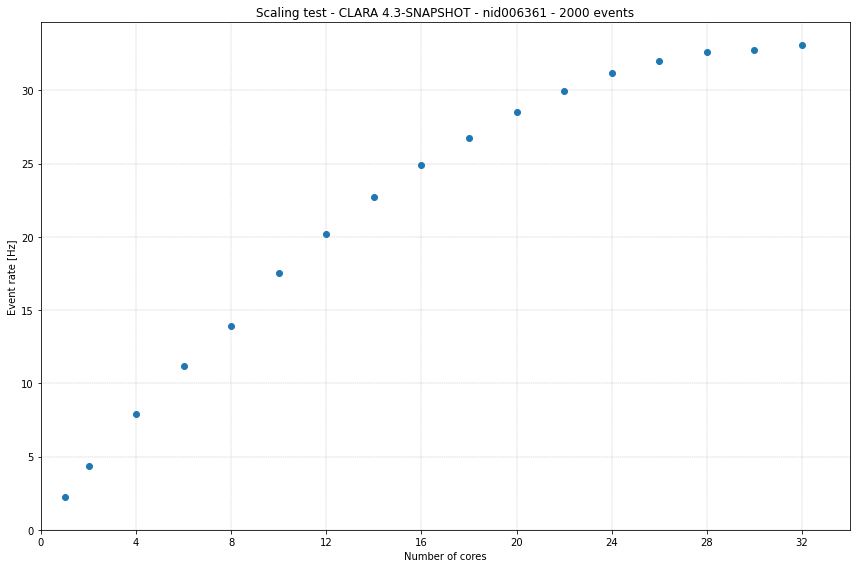

In [6]:
ax = df.plot(x='Cores', y='EvRate', style='o', legend=False, xlim=xlim, xticks=xticks)
ax.set_title(title)
ax.set_ylim(bottom=0)
ax.set_xlabel('Number of cores')
ax.set_ylabel('Event rate [Hz]');

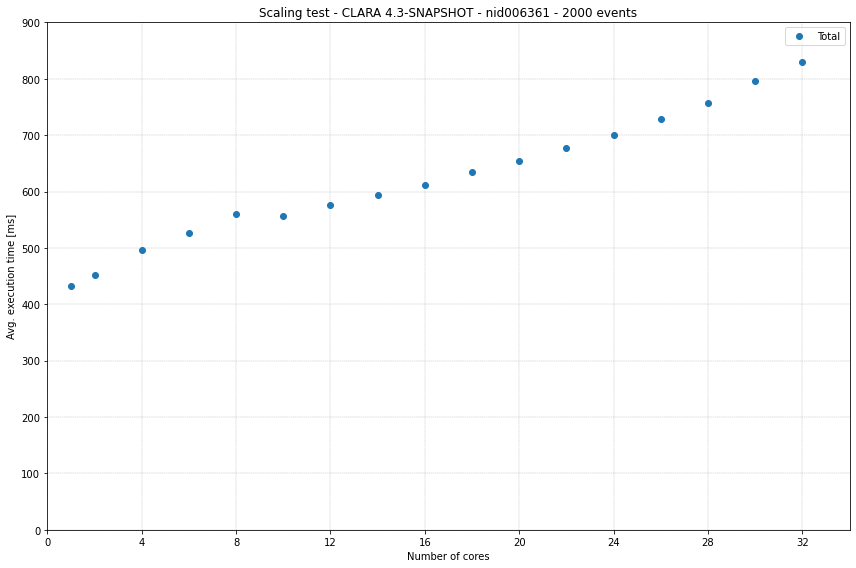

In [7]:
_, ax = plt.subplots()

df.plot(x='Cores', y='TOTAL', ax=ax, label='Total', style='o')

ax.set_title(title)
ax.set_xticks(xticks)
ax.set_xlim(xlim)
ax.set_ylim(0, 900)
ax.set_xlabel('Number of cores')
ax.set_ylabel('Avg. execution time [ms]')
ax.legend();